In [231]:
import os # os
import numpy as np # NumPy
import pandas as pd # Pandas
import matplotlib.pyplot as plt # Pandas
import tensorflow as tf # Tensorflow
from tensorflow import keras # Keras
from tensorflow.keras import *
from tensorflow.keras.layers import *
from keras.callbacks import EarlyStopping
# sklearn
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Printing all input files
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/data50/DataV5.csv
/kaggle/input/version200/DataV7.csv
/kaggle/input/red-filter-version-1/DataRedFilterVersion1.csv
/kaggle/input/data100/DataV6.csv
/kaggle/input/version8/DataV8.csv
/kaggle/input/version-1/DataV3.csv
/kaggle/input/alldata/DataALL.csv
/kaggle/input/version-2/DataV4.csv
/kaggle/input/lstm-data/Data.csv


In [232]:

my_imputer = SimpleImputer()
print("Hi")

path = "/kaggle/input/alldata/DataALL.csv"
df = pd.read_csv(path).values
df2 = pd.read_csv(path)
# Define X and y values


X = df[:, 2:]
y = df[:, 1:2] - 1

print(len(X.tolist()))
y = np.array([i if i == [1] else [0] for i in y.tolist()])

#for j in range(len(X.tolist())):
#     for i in range(len(X.tolist()[j])):
#         if np.isnan(X[j, i]):
#             X[j, i] = X[j, i - 1]
#     print("done", j)
            

temp = pd.DataFrame(X)
temp = temp.ffill(axis = 1)
X = temp.values
X_mean = np.mean(X, axis=1, keepdims=True)
X_std = np.std(X, axis=1, keepdims=True)

X = (X - X_mean) / X_std

Hi
16252


In [233]:
print(np.sum(np.isnan(X)))
print(np.sum(np.isnan(y)))

0
0


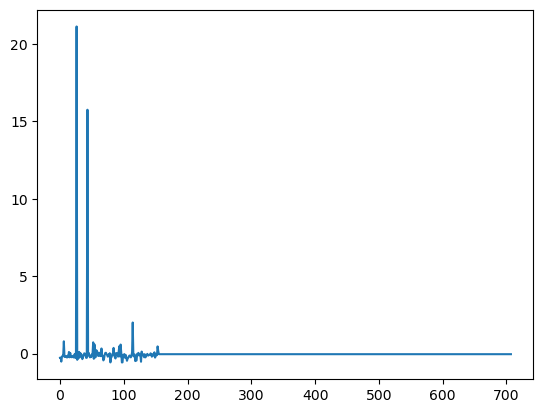

In [234]:
random_index = np.random.randint(0, X.shape[0])

plt.plot(X[random_index])

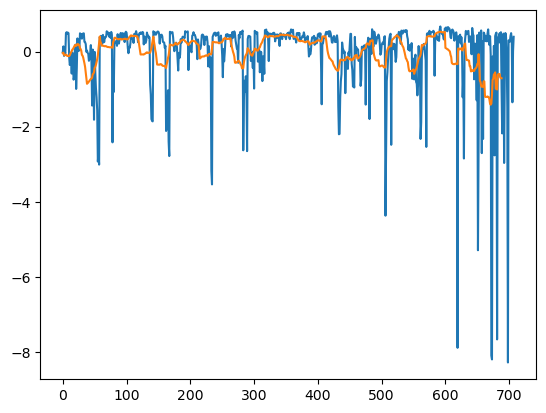

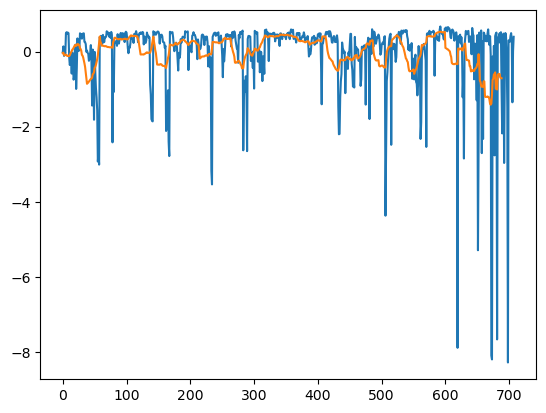

In [235]:
rolling_timesteps = 20
X_smooth = pd.DataFrame(X)

# Smoothen the data
X_smooth = X_smooth.rolling(rolling_timesteps, axis = 1).mean() 
X_smooth = X_smooth.dropna(axis = 1).values


my_imputer = SimpleImputer()
X_smooth = my_imputer.fit_transform(X_smooth)
# Generate a random index and plot the raw + smoothened data at that index
random_index = np.random.randint(0, X.shape[0])
plt.plot(X[0])
plt.plot(X_smooth[0])
plt.show(0)

[1.]


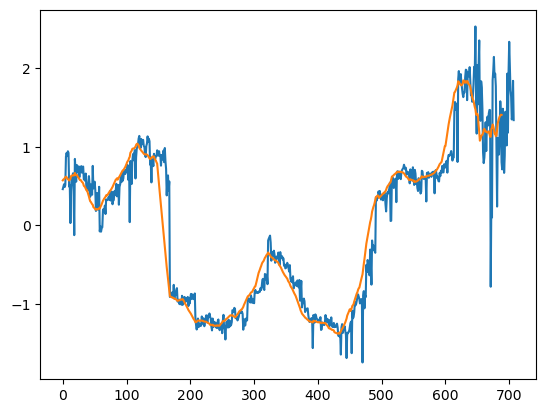

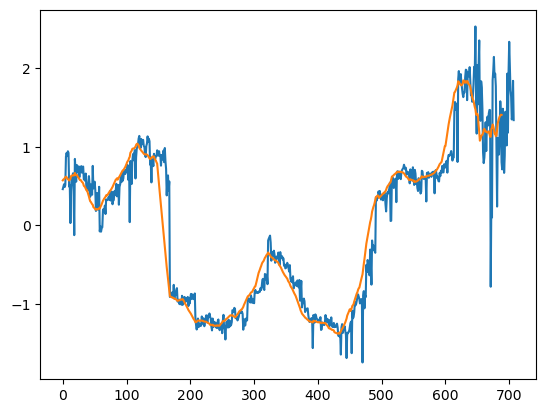

In [236]:
n665454 = 12
print(y[n665454])
plt.plot(X[n665454])
plt.plot(X_smooth[n665454])
plt.show(0)

In [237]:
X_smooth = X_smooth.reshape(X_smooth.shape + (1,))

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_smooth, y, test_size = 0.29, random_state = 42)

# Sanity check
print(X_smooth.shape)
print(y.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16252, 689, 1)
(16252, 1)
(11538, 689, 1)
(4714, 689, 1)
(11538, 1)
(4714, 1)


In [238]:

X_smooth

array([[[-0.03936419],
        [-0.02906214],
        [-0.08572341],
        ...,
        [-0.69338811],
        [-0.70447062],
        [-0.71055819]],

       [[-0.37267831],
        [-0.36539365],
        [-0.38982302],
        ...,
        [ 3.84992227],
        [ 4.17442073],
        [ 4.44130416]],

       [[-0.37689575],
        [-0.35465584],
        [-0.44011473],
        ...,
        [-0.37596909],
        [-0.39810603],
        [-0.24386818]],

       ...,

       [[-0.79036255],
        [-0.78645736],
        [-0.78949473],
        ...,
        [-0.05640229],
        [-0.05640229],
        [-0.05640229]],

       [[ 2.49762475],
        [ 2.46696989],
        [ 2.31944334],
        ...,
        [-0.24598582],
        [-0.24598582],
        [-0.24598582]],

       [[ 1.33468593],
        [ 1.33385776],
        [ 1.33717043],
        ...,
        [-0.03924439],
        [-0.03924439],
        [-0.03924439]]])

In [245]:
# Create model_1
#model_1 = Sequential()
#model_1.add(LSTM(50, activation='relu', return_sequences=True, input_shape=X_smooth[0].shape))

#model_1.add(LSTM(16, activation='sigmoid'))
#model_1.add(Dense(1))
#model_1.compile(optimizer='adam', loss='mse'metrics = ["binary_accuracy"]))


model_1 = Sequential([LSTM(128, input_shape = X_smooth[0].shape), 
                       Dense(1),
                       Activation("sigmoid"),
                      ])

opt = keras.optimizers.Adam(learning_rate=0.001)

# Compile model 
model_1.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["binary_accuracy"])

# Model summary
model_1.summary()



Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 128)               66560     
                                                                 
 dense_14 (Dense)            (None, 1)                 129       
                                                                 
 activation_14 (Activation)  (None, 1)                 0         
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [240]:
X_smooth.shape

(16252, 689, 1)

Epoch 1/135
361/361 [==============================] - 15s 41ms/step - loss: 0.4260 - binary_accuracy: 0.8235 - val_loss: 0.4279 - val_binary_accuracy: 0.8199
Epoch 2/135
361/361 [==============================] - 14s 39ms/step - loss: 0.4279 - binary_accuracy: 0.8222 - val_loss: 0.4234 - val_binary_accuracy: 0.8237
Epoch 3/135
361/361 [==============================] - 15s 40ms/step - loss: 0.4279 - binary_accuracy: 0.8216 - val_loss: 0.4254 - val_binary_accuracy: 0.8203
Epoch 4/135
361/361 [==============================] - 14s 40ms/step - loss: 0.4391 - binary_accuracy: 0.8229 - val_loss: 0.4416 - val_binary_accuracy: 0.8205
Epoch 5/135
361/361 [==============================] - 15s 41ms/step - loss: 0.4373 - binary_accuracy: 0.8203 - val_loss: 0.4724 - val_binary_accuracy: 0.8180
Epoch 6/135
361/361 [==============================] - 14s 40ms/step - loss: 0.4579 - binary_accuracy: 0.8216 - val_loss: 0.4411 - val_binary_accuracy: 0.8167
Epoch 7/135
361/361 [=========================

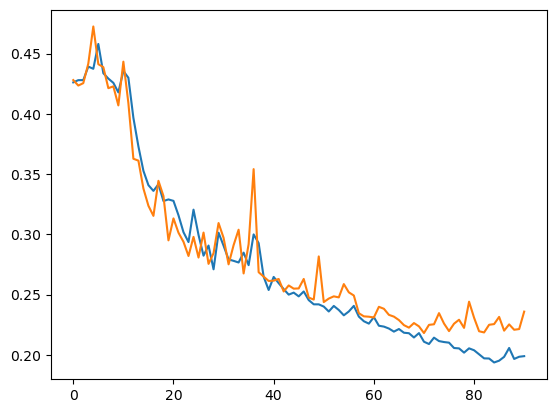

In [250]:
np.random.seed(1)
#num_examples = 14000 # train on only some examples

# Generating "num_examples" random indices and selecting those data examples
random_indices = np.random.randint(0,X_train.shape[0])
X_train_random_indices = X_train[random_indices]
y_train_random_indices = y_train[random_indices]

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20, restore_best_weights = True)

# Train model (10 epochs)
history = model_1.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 135, callbacks = es)
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();
history_df['val_loss'].plot();

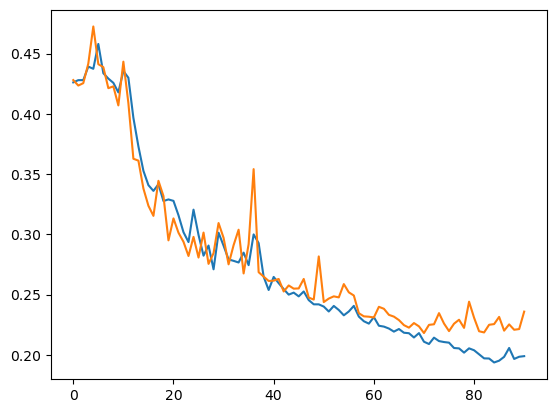

In [251]:
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();
history_df['val_loss'].plot();

In [252]:
pre = model_1.predict(X_smooth)
def prob(pVal):
    num_correct = 0
    num_incorrect = 0
    predictions = [] 

    for i in range(0, len(pre)):
    
    #print(pre[i][0])
        if(pre[i][0] > pVal):
            predictions.append(1)
        else:
            predictions.append(0)
    
    for i in range(0, len(pre)):
        if(predictions[i] == y[i]):
            num_correct += 1 
        else:
            num_incorrect += 1
    return num_correct/(num_incorrect + num_correct)
prob_vals = np.arange(0, 1, 0.01)
prob_list = []
for i in prob_vals:
    prob_list.append(prob(i))
max_prob = max(prob_list)
max_index = prob_list.index(max_prob)
print("Max prob:", max_prob, "preffered cuttoff: ", max_index, prob_vals[max_index])
num_correct = 0
num_incorrect = 0
predictions = [] 

for i in range(0, len(pre)):
    
    #print(pre[i][0])
    if(pre[i][0] > 0.49):
        predictions.append(1)
    else:
        predictions.append(0)
    
for i in range(0, len(pre)):
    if(predictions[i] == y[i]):
        num_correct += 1 
    else:
        num_incorrect += 1
print("Maximum Probability", num_correct/(num_incorrect + num_correct))
    

508/508 [==============================] - 7s 14ms/step
Max prob: 0.9244400689145952 preffered cuttoff:  54 0.54
Maximum Probability 0.9236401673640168


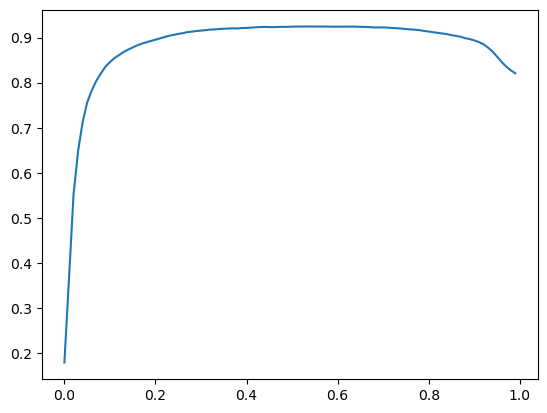

In [254]:
prob_vals = list(prob_vals)
plt.plot(prob_vals, prob_list)

In [255]:
model.save('LSTM-92-54.h5')